# Food

## Data 

### Expenditures on food and alcoholic beverages that were consumed at home by selected countries

http://www.ers.usda.gov/data-products/food-expenditures.aspx

(direct link: http://www.ers.usda.gov/datafiles/Food_Expenditures/Expenditures_on_food_and_alcoholic_beverages_that_were_consumed_at_home_by_selected_countries/table97_2014.xlsx)




### Consumer price indexes historical data, 1974 through 2015

http://www.ers.usda.gov/data-products/food-price-outlook.aspx														


Unit: percent changes


See also:

http://www.bls.gov/cpi/data.htm

### lkasdjf

http://wdi.worldbank.org/table/2.9#

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [6]:
df = pd.read_excel('table97_2014.xlsx')
#df = df.transpose()

df_continents = pd.read_csv('continents_countries.csv', sep=';', usecols=('Country (en)', 'Continent'))
df_continents.index = df_continents['Country (en)']
df_continents = df_continents.drop('Country (en)', axis=1)

df_merge = df.merge(df_continents, how='left', left_index=True, right_index=True)
#df_merge[df_merge['Continent'] != df_merge['Continent']] -> be sure that all got a continent
df_merge.head()

,Food,Alcohol and tobacco,Consumer expenditures,Expenditures on food,Continent
USA,6.536189,2.006948,36558.0,2389.5,North America
Singapore,6.737127,1.918355,20976.3,1413.2,Asia
United Kingdom,8.699629,3.995698,27985.1,2434.6,Europe
Switzerland,8.894999,3.675126,45865.1,4079.7,Europe
Canada,9.348855,3.430102,26809.7,2506.4,North America


In [3]:
df_distribution = pd.read_excel('distribution_clean.xls', usecols=['Country', 'Gini index'])
print(df_distribution.columns)
df_distribution.head()

Index(['Country', 'Gini index'], dtype='object')


,Country,Gini index
0,Afghanistan,..
1,Albania,29
2,Algeria,35.3
3,American Samoa,..
4,Andorra,..


In [4]:

df_sample = df.sample(n=5, weights='Food')
df_sample = df_sample.append(df.loc['USA'])
df_sample = df_sample.append(df.loc['Italy'])
df_sample = df_sample.append(df.loc['Nigeria'])
df_sample = df_sample.append(df.loc['Singapore'])
df_sample = df_sample.append(df.loc['United Kingdom'])
df_sample = df_sample.drop_duplicates()
df_sample = df_sample.sort_values('Food', ascending=False)

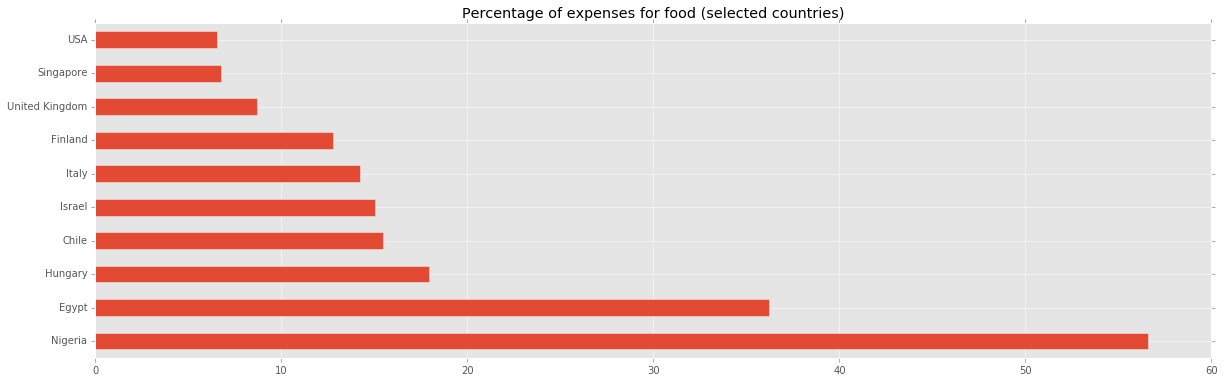

In [5]:
ax = df_sample['Food'].plot(kind='barh', figsize=(20, 6))
ax.set_title('Percentage of expenses for food (selected countries)')
plt.savefig('Percentage_income.pdf')

In [16]:
#df = df.merge(on='')
#df_distribution.index = df_distribution['Country']
#df_distribution = df_distribution.drop('Country', axis=1)

df_distribution = df_distribution[df_distribution['Gini index'] != '..']
df_distribution.head()

,Gini index
Country,
Albania,29
Algeria,35.3
Angola,42.7
Argentina,42.3
Armenia,31.5


In [35]:
#df_merge = df.merge(df_distribution, left_index=True, right_index=True)

,Food,Alcohol and tobacco,Consumer expenditures,Expenditures on food,Continent
USA,6.536189,2.006948,36558.0,2389.5,North America
Singapore,6.737127,1.918355,20976.3,1413.2,Asia
United Kingdom,8.699629,3.995698,27985.1,2434.6,Europe
Switzerland,8.894999,3.675126,45865.1,4079.7,Europe
Canada,9.348855,3.430102,26809.7,2506.4,North America


In [61]:
df_captions = df.sample(n=5, weights='Food')
df_captions = df_captions.append(df.loc['USA'])
df_captions = df_captions.append(df.loc['Italy'])
df_captions = df_captions.append(df.loc['Nigeria'])
df_captions = df_captions.append(df.loc['Singapore'])
df_captions = df_captions.append(df.loc['Switzerland'])
df_captions = df_captions.append(df.loc['Australia'])
df_captions = df_captions.append(df.loc['United Kingdom'])
df_captions = df_captions.drop_duplicates()
df_captions = df_captions.sort_values('Food', ascending=False)

for name, country in df_captions.iterrows():
    print(name, country['Food'])

Nigeria 56.6145152448
Iran 24.6152473569
Dominican Republic 23.6368395619
Israel 15.007224673
Italy 14.2329105736
Hong Kong, China 14.1902551199
Japan 13.4695829972
Australia 9.87817124126
Switzerland 8.8949985937
United Kingdom 8.69962944567
Singapore 6.73712713872
USA 6.53618906942


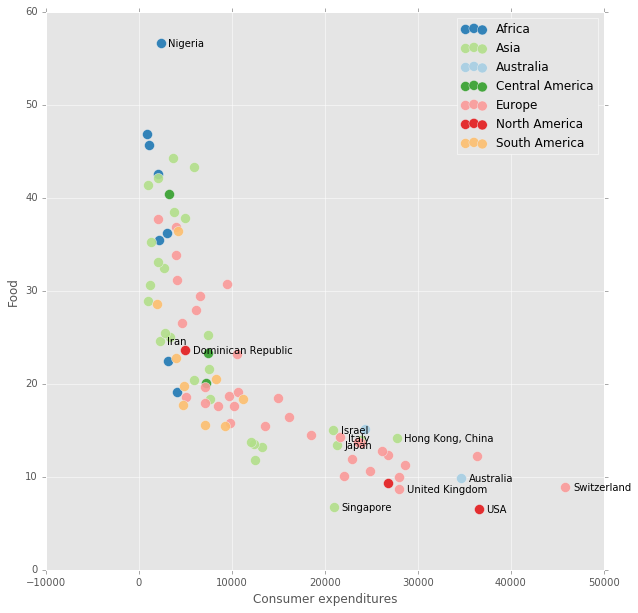

In [70]:
#df_merge.plot(kind='scatter', x='Consumer expenditures', y='Food')

fig, ax = plt.subplots(figsize=(10,10))

colors = ['#1f78b4','#b2df8a','#a6cee3','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
i = 0
for continent, group in df_merge.groupby('Continent'):
    group.plot(kind='scatter', x='Consumer expenditures', s=100, y='Food', ax=ax, c=colors[i], alpha=.9, label=continent) # cmap=plt.cm.coolwarm
    i += 1

for name, row in df_captions.iterrows():
    x_gap = 800
    ax.text(row['Consumer expenditures']+x_gap, row['Food']-.4, name )

plt.savefig('Food_prices_continents.pdf')

In [97]:
set(df_merge['Continent'].values)


{'Africa',
 'Asia',
 'Australia',
 'Central America',
 'Europe',
 'North America',
 'South America'}

In [142]:
def get_continent_index(continent_name):
    continent_names = ['Africa',
 'Asia',
 'Australia',
 'Central America',
 'Europe',
 'North America',
 'South America']
    try:
        return continent_names.index(continent_name)
    except:
        print("Not in list:", continent_name)
get_continent_index('Australia')

2

In [109]:
df_merge['Continent_id'] = df_merge['Continent'].apply(get_continent_index)

In [124]:
color_indexes = list(df_merge.sort_values(by='Food', ascending=False)['Continent_id'])
color_list = [colors[i] for i in color_indexes]
color_list[:10]

['#1f78b4',
 '#1f78b4',
 '#1f78b4',
 '#b2df8a',
 '#b2df8a',
 '#1f78b4',
 '#b2df8a',
 '#b2df8a',
 '#33a02c',
 '#b2df8a']

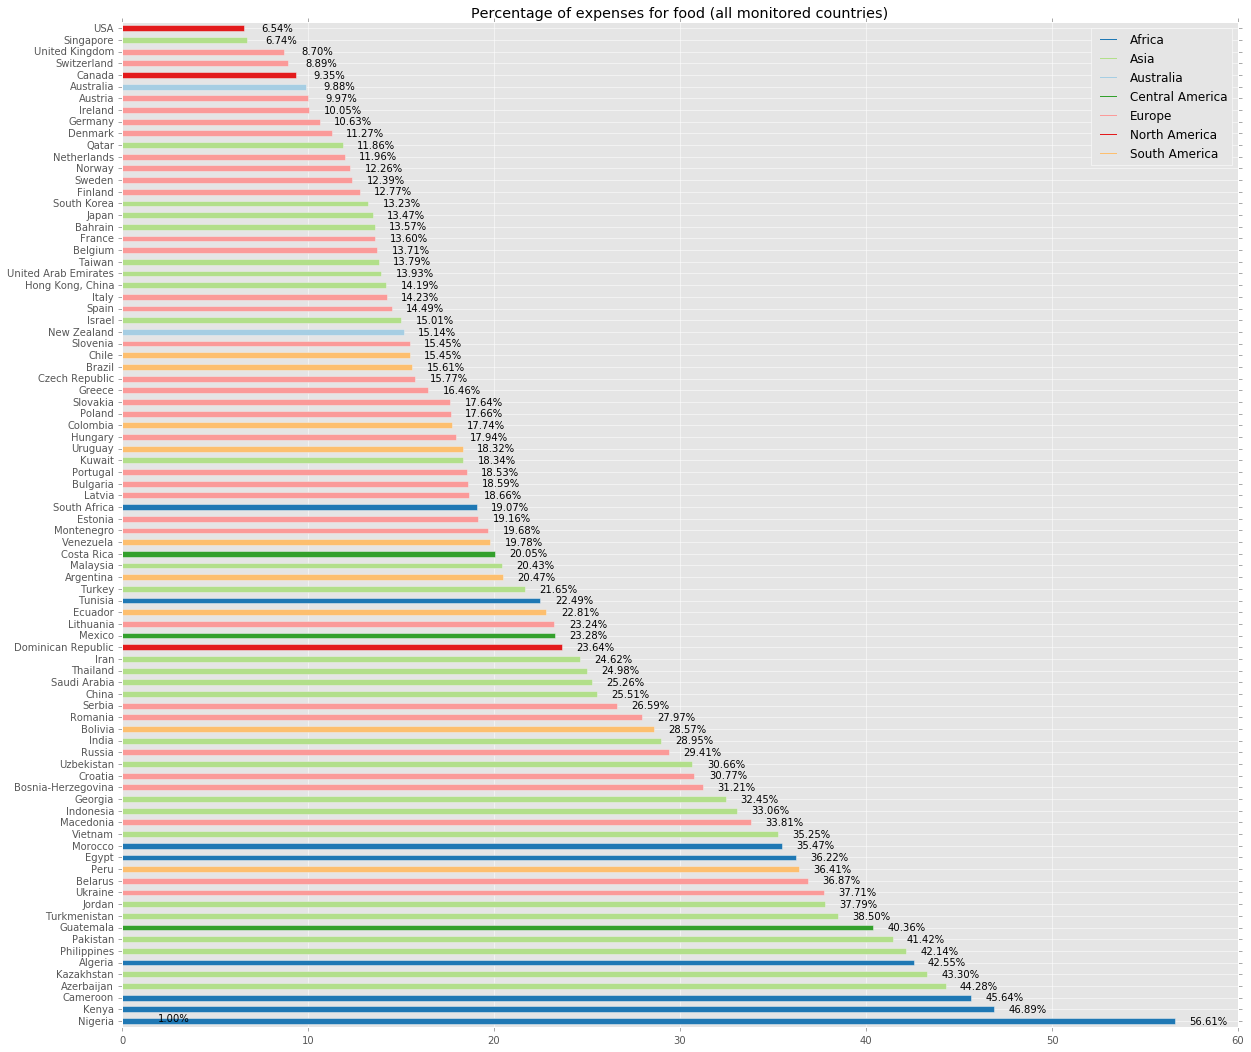

In [184]:
import matplotlib as mpl

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=6)
#cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')

sorted_df = df_merge.sort_values(by='Food', ascending=False)

ax = sorted_df['Food'].plot(kind='barh', color=color_list, figsize=(20, 18))
ax.set_title('Percentage of expenses for food (all monitored countries)')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

rectangles = [i for i in ax.get_children() if isinstance(i, matplotlib.patches.Rectangle)]
for rect in rectangles:
    width = rect.get_width()
    ax.text(width + 1.8, rect.get_y() - height/3.,
            "{0:.2f}%".format(width),
            ha='center', va='bottom')


lines = []
continent_names = ['Africa',
 'Asia',
 'Australia',
 'Central America',
 'Europe',
 'North America',
 'South America']
for i in range(0, 7):
    line, = plt.plot([], c=colors[i], label=continent_names[i])
    lines.append(line)
plt.legend(handles=lines)
plt.savefig('barh.pdf')


In [172]:
children = ax.get_children()
for child in children:
    if isinstance(child, matplotlib.patches.Rectangle):
        print('Rectangle')

Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle
Rectangle


In [161]:
for index, row in sorted_df.iterrows():
    print("{0:.2f}%".format(row['Food']))

56.61%
46.89%
45.64%
44.28%
43.30%
42.55%
42.14%
41.42%
40.36%
38.50%
37.79%
37.71%
36.87%
36.41%
36.22%
35.47%
35.25%
33.81%
33.06%
32.45%
31.21%
30.77%
30.66%
29.41%
28.95%
28.57%
27.97%
26.59%
25.51%
25.26%
24.98%
24.62%
23.64%
23.28%
23.24%
22.81%
22.49%
21.65%
20.47%
20.43%
20.05%
19.78%
19.68%
19.16%
19.07%
18.66%
18.59%
18.53%
18.34%
18.32%
17.94%
17.74%
17.66%
17.64%
16.46%
15.77%
15.61%
15.45%
15.45%
15.14%
15.01%
14.49%
14.23%
14.19%
13.93%
13.79%
13.71%
13.60%
13.57%
13.47%
13.23%
12.77%
12.39%
12.26%
11.96%
11.86%
11.27%
10.63%
10.05%
9.97%
9.88%
9.35%
8.89%
8.70%
6.74%
6.54%


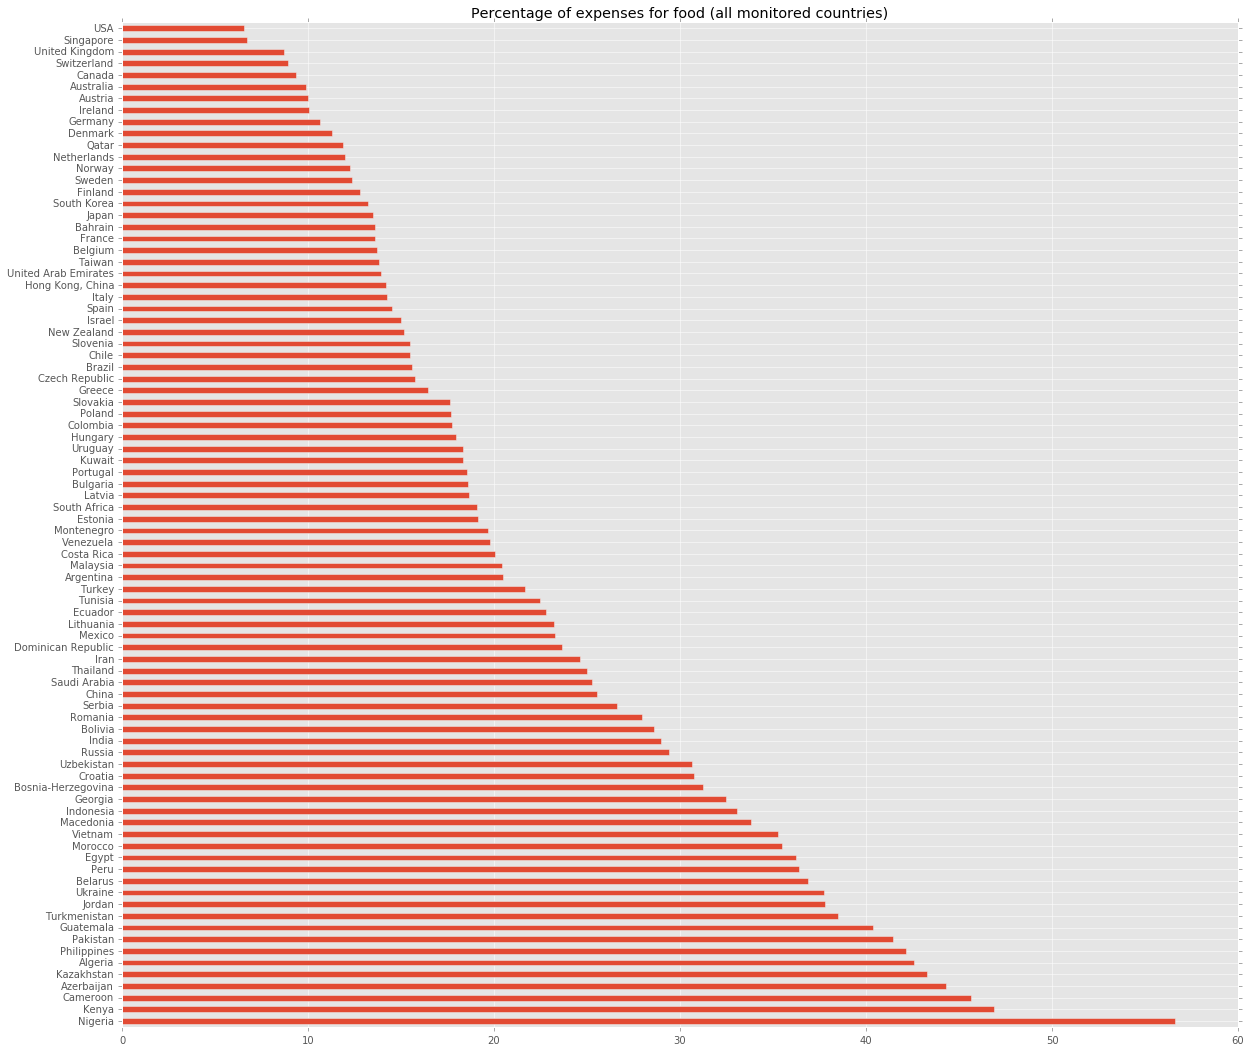

In [63]:
ax = df['Food'].sort_values(ascending=False).plot(kind='barh', figsize=(20, 18))
ax.set_title('Percentage of expenses for food (all monitored countries)')
plt.savefig('Percentage_income_full.pdf')

In [166]:
dfp = pd.read_excel('food_prices.xlsx')

# does not work
#def parse_date(str_date):
#    return dateutil.parser.parse(str(str_date))
#df['Year'] = df['Year'].apply(parse_date)

dfp.head()

,Year,Food at home,"Meats, poultry, and fish",Meats,Beef and veal,Pork,Other meats,Poultry,Fish and seafood,Eggs,...,Fats and oils,Fruits and vegetables,Fresh fruits & vegetables,Fresh fruits,Fresh vegetables,Processed fruits & vegetables,Sugar and sweets,Cereals and bakery products,Nonalcoholic beverages,Other foods
0,1974,14.9,2.2,1.8,2.9,-0.5,3.1,-5.1,15.3,0.4,...,41.9,16.5,7.8,8.7,7.3,NaN,52.4,29.9,19.3,21.4
1,1975,8.2,8.5,8.5,1.0,22.4,5.9,10.5,8.5,-1.8,...,10.7,3.1,2.3,6.8,-1.1,NaN,26.1,11.3,15.0,12.8
2,1976,2.1,0.9,0.2,-3.2,1.3,5.9,-4.1,11.7,9.2,...,-12.5,2.6,2.4,-0.2,4.3,NaN,-11.3,-2.2,19.6,4.1
3,1977,5.9,-0.6,-2.3,-0.7,-5.4,-0.6,0.7,10.8,-3.2,...,10.1,9.2,13.6,14.9,12.6,NaN,5.0,1.6,50.6,3.4
4,1978,10.5,16.7,18.6,22.9,12.9,17.7,10.4,9.4,-5.4,...,9.6,11.1,12.9,19.5,8.0,NaN,12.3,9.0,5.8,8.0


In [171]:
dfp.index = dfp['Year']

# df = df.drop('Year', axis=1)

df_recent = dfp[dfp.Year >= 2000]
df_recent.head()
#dfp.columns

,Year,Food at home,"Meats, poultry, and fish",Meats,Beef and veal,Pork,Other meats,Poultry,Fish and seafood,Eggs,...,Fats and oils,Fruits and vegetables,Fresh fruits & vegetables,Fresh fruits,Fresh vegetables,Processed fruits & vegetables,Sugar and sweets,Cereals and bakery products,Nonalcoholic beverages,Other foods
Year,,,,,,,,,,,,,,,,,,,,,
2000,2000,2.3,4.5,5.9,6.4,7.3,2.6,1.2,2.8,3.0,...,-0.6,0.7,0.7,-3.0,4.8,1.1,1.1,1.8,2.6,2.0
2001,2001,3.3,4.4,5.7,8.4,3.8,2.9,3.2,0.4,3.4,...,5.6,3.7,3.8,2.6,5.1,3.2,1.1,2.9,1.0,2.2
2002,2002,1.3,0.5,0.6,0.1,-0.4,3.5,1.3,-1.6,1.3,...,-0.2,4.1,4.2,1.9,6.4,3.8,2.1,2.2,0.0,0.6
2003,2003,2.2,4.0,5.4,9.0,1.9,2.5,1.3,1.0,13.8,...,1.3,2.3,2.7,3.3,2.1,0.9,1.9,2.4,0.4,1.0
2004,2004,3.8,7.4,8.4,11.5,5.6,4.5,7.5,2.3,6.2,...,6.6,3.0,3.5,2.8,4.3,1.2,0.7,1.6,0.4,0.5


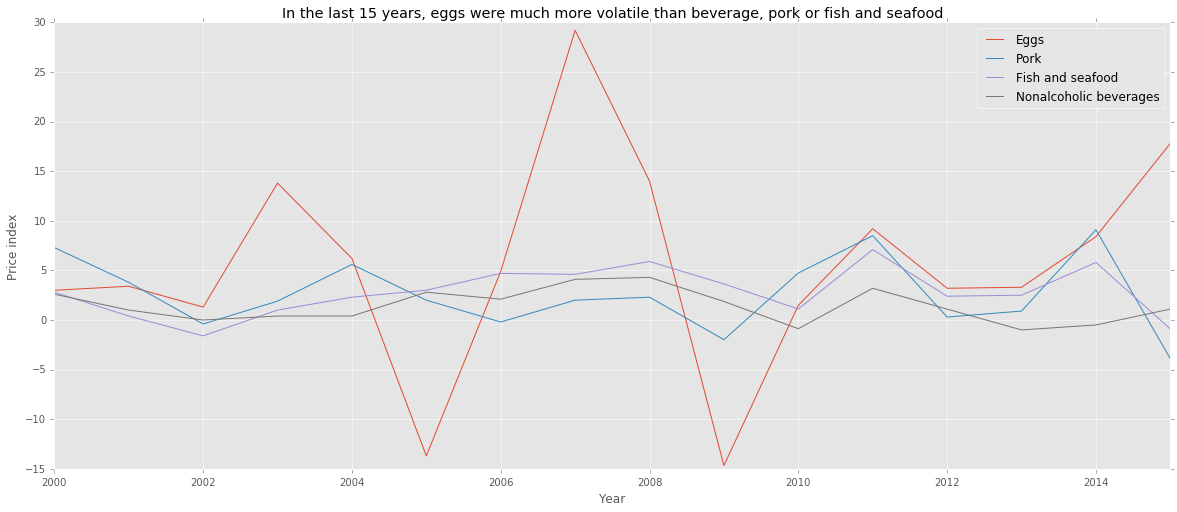

In [179]:
ax = plt.subplot()

df_recent['Eggs'].plot(ax=ax, figsize=(20, 8))
df_recent['Pork'].plot()
df_recent['Fish and seafood'].plot()
df_recent['Nonalcoholic beverages'].plot()

ax.legend()
ax.set_title('In the last 15 years, eggs were much more volatile than beverage, pork or fish and seafood')
ax.set_ylabel('Price index')
plt.savefig('Eggs_volatility.pdf')

In [46]:
df.loc[1975] - df.loc[2015]

Year                            -40.0
Food at home                      7.0
Meats, poultry, and fish          6.6
Meats                             5.5
Beef and veal                    -6.2
Pork                             26.3
Other meats                       1.8
Poultry                          10.1
Fish and seafood                  9.4
Eggs                            -19.6
Dairy products                    4.4
Fats and oils                    11.7
Fruits and vegetables             3.3
Fresh fruits & vegetables         2.8
Fresh fruits                      9.0
Fresh vegetables                 -2.7
Processed fruits & vegetables     NaN
Sugar and sweets                 22.9
Cereals and bakery products      10.2
Nonalcoholic beverages           13.9
Other foods                      11.2
dtype: float64

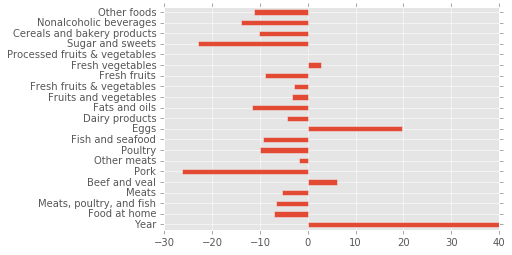

In [83]:
(df.loc[2015] - df.loc[1975]).plot(kind='barh')

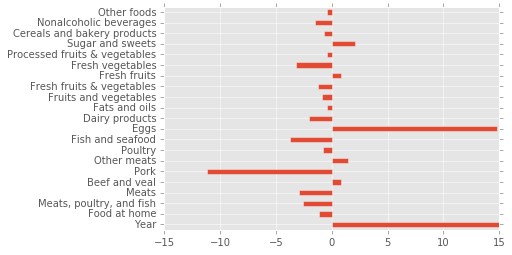

In [82]:
(df.loc[2015] - df.loc[2000]).plot(kind='barh')